File with functions for cleaning data for use in app.py. Cleans the raw recipes.csv data and exports as recipe_data.csv.

Adds dietary label variable to recipe_data df. Also converts time strings to integer minutes, for prep_time, cook_time, and total_time, to make cleaned versions of those variables (cleaned_prep_time, etc.)

In [13]:
import pandas as pd
from collections import Counter
import re

In [2]:
recipe_data = pd.read_csv("data/recipes.csv")

In [12]:
column_name = "ingredients"

word_bank = []

measurements = ["cups", "cup", "tbsp", "tablespoons", "tablespoon", "tsp", "teaspoons", "teaspoon",
    "oz", "ounces", "ounce", "pounds", "pound", "lbs", "lb", "grams", "gram", "kg", "kilograms", "kilogram",
    "ml", "milliliters", "milliliter", "liters", "liter", "quarts", "quart", "pints", "pint", "gallons", "gallon"]

fractions = ['½', '¼', '¾', '⅓', '⅔', '⅛', '⅜', '⅝', '⅞']

verbs = ["chopped", "softened", "or to taste", "or as needed", "divided", "melted", "or more to taste", "juiced", 
         "peeled", "drained", "cored", "minced", "beaten", "sliced", "diced", "pitted", "and sliced", "thawed", 
         "cored and chopped", "quartered", "pitted and chopped", "thinly sliced", "mashed", "halved", "seeded", 
         "skinless", "cored and sliced", "pitted and sliced", "finely chopped", "peeled and diced", "peeled and sliced", 
         "pitted and diced", "seeded and diced", "and diced", "or more as needed", "halved and pitted", "lightly beaten", 
         "and chopped", "cut into cubes", "cut into pieces", "crushed", "at room temperature", "cut into chunks", "cored and diced", 
         "and cubed", "room temperature", "cut into -inch cubes", "seeded and chopped", "for garnish", "peeled and chopped", 
         "seeded and cubed", "hulled", "broken into chunks", "peeled and pitted", "and cut into chunks", "cubed", "zested", "shredded",
         "cored and thinly sliced", "peeled and cored", "roughly chopped", "drained with juice reserved", "crumbled", "seeded and minced",
         "toasted", "baked", "stemmed and quarted", "cut into wedges", "coarsely chopped", "peeled and seeds separated", "drained and rinsed", 
         "cored and sliced /-inch thick", "and sliced /-inch thick", "thawed but still cold follow package directions", "cored and sliced / inch thick",
         "heated"]

for index, row in recipe_data.iterrows():
    ingredients = str(row[column_name]).lower()  # Convert to lowercase

    # Remove parentheses by replacing them with empty strings
    ingredients = ingredients.replace("(", "").replace(")", "")
    
    # Remove digits by iterating through characters
    ingredients = ''.join([char if not char.isdigit() else '' for char in ingredients])
    
    for fraction in fractions:
        ingredients = ingredients.replace(fraction, "")

    for verb in verbs:
        ingredients = ingredients.replace(verb, '')
        
    # Split ingredients by commas
    ingredient_list = [ingredient.strip() for ingredient in ingredients.split(',') if ingredient.strip()]
    
    # Filter out measurements and empty strings
    filtered_ingredients = []
    for ingredient in ingredient_list:
        words = ingredient.split()
        filtered_words = [word for word in words if word not in measurements]
        if filtered_words:
            filtered_ingredients.append(" ".join(filtered_words))
   
    for ingredient in filtered_ingredients:
        word_bank.append(ingredient)

word_frequency = Counter(word_bank)

print(word_frequency)

non_vegan = ['chicken', 'beef', 'lamb', 'duck', 'pork', 'egg', 'milk', 'cheese', 'yogurt', 'butter', 'fish', 'honey', 'salmon', 'cod', 'trout', 'tuna', 'sardine', 'mackerel', 'catfish', 'halibut', 'tilapia', 'mahi-mahi']
non_vegetarian = ['chicken', 'beef', 'lamb', 'duck', 'pork', 'fish', 'salmon', 'cod', 'trout', 'tuna', 'sardine', 'mackerel', 'catfish', 'halibut', 'tilapia', 'mahi-mahi']


Counter({'white sugar': 587, 'and': 359, 'butter': 320, 'all-purpose flour': 315, 'salt': 296, 'ground cinnamon': 257, 'vanilla extract': 202, 'water': 179, 'baking powder': 145, 'baking soda': 134, 'milk': 134, 'brown sugar': 128, 'eggs': 126, 'lemon juice': 104, 'ground nutmeg': 86, 'vegetable oil': 83, 'olive oil': 78, 'egg': 67, 'walnuts': 67, 'cornstarch': 65, 'unsalted butter': 59, 'packed brown sugar': 57, 'honey': 56, 'large eggs': 55, 'pecans': 45, 'cloves garlic': 42, 'salt and ground black pepper to taste': 41, 'ground black pepper': 39, 'fresh cilantro': 38, 'lemon': 36, 'onion': 35, 'pinch salt': 34, 'ground cloves': 33, 'flaked coconut': 33, 'margarine': 32, "confectioners' sugar": 31, 'thinly': 31, 'sugar': 29, 'apples -': 29, 'orange juice': 28, 'dates': 28, 'ground allspice': 27, 'raisins': 27, 'large egg': 27, 'ice cubes': 27, 'bananas': 27, 'apples': 26, 'rolled oats': 26, 'ground ginger': 26, 'fresh lemon juice': 26, 'fresh strawberries': 26, 'banana': 26, 'balsamic

['lemon juice', 'cornstarch', 'salt', 'ground nutmeg', 'brown sugar']
[104, 65, 296, 86, 128]


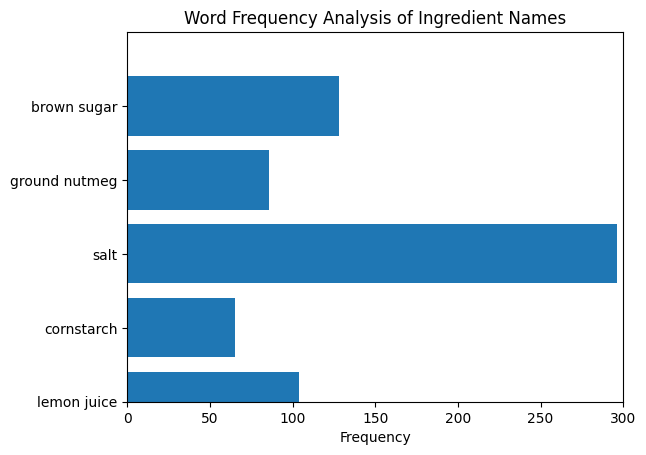

In [49]:
import matplotlib.pyplot as mp

categories = list(word_frequency.keys())[27:32]
values = list(word_frequency.values())[27:32]

print(categories)
print(values)

mp.barh(categories, values)

mp.xlabel('Frequency')
mp.title('Word Frequency Analysis of Ingredient Names')
mp.xlim(0,300)
mp.ylim(0,5)

mp.show()

In [4]:
# function to clean the ingredients column
def clean_ingredients(ingredient_text):
    ingredients = str(ingredient_text).lower()
    ingredients = ingredients.replace("(", "").replace(")", "")
    ingredients = ''.join([char if not char.isdigit() else '' for char in ingredients])
    for measurement in measurements:
        ingredients = ingredients.replace(measurement, '')
    for fraction in fractions:
        ingredients = ingredients.replace(fraction, '')
    for verb in verbs:
        ingredients = ingredients.replace(verb, '')

    ingredients = ' '.join(ingredients.split())
    return ingredients

# Apply cleaning to original ingredients
recipe_data['cleaned_ingredients'] = recipe_data['ingredients'].apply(clean_ingredients)

# --- Fix the ingredient_list to split on commas, not spaces ---
recipe_data['ingredient_list'] = recipe_data['cleaned_ingredients'].apply(
    lambda text: [
        re.sub(r"[^\w\s-]", "", item).strip()  # remove punctuation from each ingredient
        for item in text.split(',')            # split on commas
        if item.strip()                        # ignore empty parts
    ]
)


In [5]:

recipe_dict = {}

for index, row in recipe_data.iterrows():
    recipe_name = row['recipe_name']

    ingredients_list = row['ingredients']
    cleaned_ingredients = clean_ingredients(ingredients_list).split(',')
    cleaned_ingredients = [ingredient.strip() for ingredient in cleaned_ingredients if ingredient.strip()]

    recipe_dict[recipe_name] = cleaned_ingredients

ingredients = 'ingredients'
ingredient_keys = [item.lower() for item in ingredients]
        
def label_diet(ingredient_list):
    ingredient_list = [str(ingredient).lower() for ingredient in ingredient_list]

    # First: check if any meat/seafood is present
    for ingredient in ingredient_list:
        if any(animal in ingredient for animal in non_vegetarian):
            return None  # Not vegetarian or vegan

    # Second: check if any animal byproduct (egg, milk, etc.) is present
    for ingredient in ingredient_list:
        if any(animal_product in ingredient for animal_product in non_vegan):
            return "vegetarian"

    # Otherwise: vegan
    return "vegan"

recipe_data['Dietary Label'] = recipe_data['ingredient_list'].apply(label_diet)
recipe_data['cleaned_ingredients'] = recipe_data['ingredient_list'].apply(clean_ingredients)

recipe_data


,Unnamed: 0,recipe_name,prep_time,cook_time,total_time,servings,yield,ingredients,directions,rating,url,cuisine_path,nutrition,timing,img_src,cleaned_ingredients,ingredient_list,Dietary Label
0,0,Apple-Cranberry Crostada,NaN,NaN,NaN,8,6 to 8 - servings,"3 tablespoons butter, 2 pounds Granny Smith ap...",Heat butter in a large skillet over medium-hig...,4.4,https://www.allrecipes.com/recipe/76931/apple-...,/Desserts/Fruit Desserts/Apple Dessert Recipes/,"Total Fat 18g 23%, Saturated Fat 7g 34%, Chole...","Servings: 8, Yield: 6 to 8 - servings",https://www.allrecipes.com/thmb/Tf1wH73bfH6Oql...,"['butter', 'granny smith apples or other firm'...","[butter, granny smith apples or other firm, cr...",vegetarian
1,1,Apple Pie by Grandma Ople,30 mins,1 hrs,1 hrs 30 mins,8,1 9-inch pie,"8 small Granny Smith apples, or as needed, ½ c...","Peel and core apples, then thinly slice. Set a...",4.8,https://www.allrecipes.com/recipe/12682/apple-...,/Desserts/Pies/Apple Pie Recipes/,"Total Fat 19g 24%, Saturated Fat 9g 46%, Chole...","Prep Time: 30 mins, Cook Time: 1 hrs, Total Ti...",https://www.allrecipes.com/thmb/1I95oiTGz6aEpu...,"['small granny smith apples', 'unsalted butter...","[small granny smith apples, unsalted butter, a...",vegetarian
2,2,Sarah's Homemade Applesauce,10 mins,15 mins,25 mins,4,NaN,"4 apples - peeled, cored and chopped, ¾ cup w...","Combine apples, water, sugar, and cinnamon in ...",4.8,https://www.allrecipes.com/recipe/51301/sarahs...,/Side Dish/Applesauce Recipes/,"Total Fat 0g 0%, Sodium 3mg 0%, Total Carbohyd...","Prep Time: 10 mins, Cook Time: 15 mins, Total ...",https://www.allrecipes.com/thmb/VY5d0tZHB8xz6y...,"['apples -', 'and', 'water', 'white sugar', 'g...","[apples -, and, water, white sugar, ground cin...",vegan
3,3,Apple Crisp,30 mins,45 mins,1 hrs 15 mins,12,1 9x13-inch pan,"10 cups all-purpose apples, peeled, cored and ...",Preheat the oven to 350 degrees F (175 degrees...,4.7,https://www.allrecipes.com/recipe/12409/apple-...,/Desserts/Crisps and Crumbles Recipes/Apple Cr...,"Total Fat 8g 11%, Saturated Fat 5g 25%, Choles...","Prep Time: 30 mins, Cook Time: 45 mins, Total ...",https://www.allrecipes.com/thmb/uAzhPOh86PfR-N...,"['all-purpose apples', 'and', 'white sugar', '...","[all-purpose apples, and, white sugar, all-pur...",vegetarian
4,4,Apple Pie Filling,20 mins,20 mins,2 hrs 40 mins,40,5 9-inch pies,"18 cups thinly sliced apples, 3 tablespoons le...",Toss apples with lemon juice in a large bowl a...,4.7,https://www.allrecipes.com/recipe/12681/apple-...,/Desserts/Pies/Apple Pie Recipes/,"Total Fat 0g 0%, Sodium 61mg 3%, Total Carbohy...","Prep Time: 20 mins, Cook Time: 20 mins, Additi...",https://www.allrecipes.com/thmb/c0bbYaS1V_mTt_...,"['thinly apples', 'lemon juice', 'water', 'whi...","[thinly apples, lemon juice, water, white suga...",vegan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,1085,Date-Nut Balls,15 mins,10 mins,30 mins,48,4 dozen balls,"14 tablespoons butter, 1 cup pitted chopped da...",Melt butter in a saucepan over medium heat; co...,3.8,https://www.allrecipes.com/recipe/240653/date-...,/Desserts/Cookies/Fruit Cookie Recipes/Date/,"Total Fat 5g 6%, Saturated Fat 2g 12%, Cholest...","Prep Time: 15 mins, Cook Time: 10 mins, Additi...",https://www.allrecipes.com/thmb/LXm_15zLymhZ7c...,"['butter', 'dates', 'white sugar', 'crispy ric...","[butter, dates, white sugar, crispy rice cerea...",vegetarian
1086,1086,Jamaica Cake,NaN,NaN,NaN,14,1 - 13x9 inch pan,"2 cups white sugar, 1 ½ cups vegetable oil, 1 ...","Mix together sugar, vegetable oil, pecans, flo...",4.6,https://www.allrecipes.com/recipe/7509/jamaica...,/Desserts/Fruit Desserts/Banana Dessert Recipes/,"Total Fat 33g 43%, Saturated Fat 4g 21%, Chole...","Servings: 14, Yield: 1 - 13x9 inch pan",https://www.allrecipes.com/thmb/tI7g5xY5-qPV5v...,"['white sugar', 'vegetable oil', 'pecans', 'al...","[white sugar, vegetable oil, pecans, all-purpo...",vegetarian
1087,1087,Best Hot Sauce,10 mins,20 mins,3

In [6]:
# Check how many of each label
print(recipe_data["Dietary Label"].value_counts())

Dietary Label
vegetarian    659
vegan         313
Name: count, dtype: int64


In [7]:
# function to convert time strings to integer minutes
import re

def convert_to_minutes(time_string):
    if pd.isna(time_string):  # Safely handle NaN values
        return None

    # Make sure it's a string
    time_string = str(time_string).lower()

    # Extract days, hours, minutes
    days = re.search(r'(\d+)\s*day', time_string)
    hours = re.search(r'(\d+)\s*hr', time_string)
    minutes = re.search(r'(\d+)\s*min', time_string)

    total_minutes = 0
    if days:
        total_minutes += int(days.group(1)) * 24 * 60
    if hours:
        total_minutes += int(hours.group(1)) * 60
    if minutes:
        total_minutes += int(minutes.group(1))

    return total_minutes


In [8]:
# clean prep/cook/total time from time string to integer minutes (new column)
recipe_data['cleaned_prep_time'] = recipe_data['prep_time'].apply(convert_to_minutes)
recipe_data['cleaned_cook_time'] = recipe_data['cook_time'].apply(convert_to_minutes)
recipe_data['cleaned_total_time'] = recipe_data['total_time'].apply(convert_to_minutes)

In [9]:
recipe_data

,Unnamed: 0,recipe_name,prep_time,cook_time,total_time,servings,yield,ingredients,directions,rating,...,cuisine_path,nutrition,timing,img_src,cleaned_ingredients,ingredient_list,Dietary Label,cleaned_prep_time,cleaned_cook_time,cleaned_total_time
0,0,Apple-Cranberry Crostada,NaN,NaN,NaN,8,6 to 8 - servings,"3 tablespoons butter, 2 pounds Granny Smith ap...",Heat butter in a large skillet over medium-hig...,4.4,...,/Desserts/Fruit Desserts/Apple Dessert Recipes/,"Total Fat 18g 23%, Saturated Fat 7g 34%, Chole...","Servings: 8, Yield: 6 to 8 - servings",https://www.allrecipes.com/thmb/Tf1wH73bfH6Oql...,"['butter', 'granny smith apples or other firm'...","[butter, granny smith apples or other firm, cr...",vegetarian,NaN,NaN,NaN
1,1,Apple Pie by Grandma Ople,30 mins,1 hrs,1 hrs 30 mins,8,1 9-inch pie,"8 small Granny Smith apples, or as needed, ½ c...","Peel and core apples, then thinly slice. Set a...",4.8,...,/Desserts/Pies/Apple Pie Recipes/,"Total Fat 19g 24%, Saturated Fat 9g 46%, Chole...","Prep Time: 30 mins, Cook Time: 1 hrs, Total Ti...",https://www.allrecipes.com/thmb/1I95oiTGz6aEpu...,"['small granny smith apples', 'unsalted butter...","[small granny smith apples, unsalted butter, a...",vegetarian,30.0,60.0,90.0
2,2,Sarah's Homemade Applesauce,10 mins,15 mins,25 mins,4,NaN,"4 apples - peeled, cored and chopped, ¾ cup w...","Combine apples, water, sugar, and cinnamon in ...",4.8,...,/Side Dish/Applesauce Recipes/,"Total Fat 0g 0%, Sodium 3mg 0%, Total Carbohyd...","Prep Time: 10 mins, Cook Time: 15 mins, Total ...",https://www.allrecipes.com/thmb/VY5d0tZHB8xz6y...,"['apples -', 'and', 'water', 'white sugar', 'g...","[apples -, and, water, white sugar, ground cin...",vegan,10.0,15.0,25.0
3,3,Apple Crisp,30 mins,45 mins,1 hrs 15 mins,12,1 9x13-inch pan,"10 cups all-purpose apples, peeled, cored and ...",Preheat the oven to 350 degrees F (175 degrees...,4.7,...,/Desserts/Crisps and Crumbles Recipes/Apple Cr...,"Total Fat 8g 11%, Saturated Fat 5g 25%, Choles...","Prep Time: 30 mins, Cook Time: 45 mins, Total ...",https://www.allrecipes.com/thmb/uAzhPOh86PfR-N...,"['all-purpose apples', 'and', 'white sugar', '...","[all-purpose apples, and, white sugar, all-pur...",vegetarian,30.0,45.0,75.0
4,4,Apple Pie Filling,20 mins,20 mins,2 hrs 40 mins,40,5 9-inch pies,"18 cups thinly sliced apples, 3 tablespoons le...",Toss apples with lemon juice in a large bowl a...,4.7,...,/Desserts/Pies/Apple Pie Recipes/,"Total Fat 0g 0%, Sodium 61mg 3%, Total Carbohy...","Prep Time: 20 mins, Cook Time: 20 mins, Additi...",https://www.allrecipes.com/thmb/c0bbYaS1V_mTt_...,"['thinly apples', 'lemon juice', 'water', 'whi...","[thinly apples, lemon juice, water, white suga...",vegan,20.0,20.0,160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,1085,Date-Nut Balls,15 mins,10 mins,30 mins,48,4 dozen balls,"14 tablespoons butter, 1 cup pitted chopped da...",Melt butter in a saucepan over medium heat; co...,3.8,...,/Desserts/Cookies/Fruit Cookie Recipes/Date/,"Total Fat 5g 6%, Saturated Fat 2g 12%, Cholest...","Prep Time: 15 mins, Cook Time: 10 mins, Additi...",https://www.allrecipes.com/thmb/LXm_15zLymhZ7c...,"['butter', 'dates', 'white sugar', 'crispy ric...","[butter, dates, white sugar, crispy rice cerea...",vegetarian,15.0,10.0,30.0
1086,1086,Jamaica Cake,NaN,NaN,NaN,14,1 - 13x9 inch pan,"2 cups white sugar, 1 ½ cups vegetable oil, 1 ...","Mix together sugar, vegetable oil, pecans, flo...",4.6,...,/Desserts/Fruit Desserts/Banana Dessert Recipes/,"Total Fat 33g 43%, Saturated Fat 4g 21%, Chole...","Servings: 14, Yield: 1 - 13x9 inch pan",https://www.allrecipes.com/thmb/tI7g5xY5-qPV5v...,"['white sugar', 'vegetable oil', 'pecans', 'al...","[white sugar, vegetable oil, pecans, all-purpo...",vegetarian,NaN,NaN,NaN
1087,1087,Best Hot Sauce,10 mins,20 mins,30 mins,100,2 cups,"10 fresh hot chile peppers, stems removed, 1 ...","Place peppers, onion, dates, basil, parsley, t...",4.9,...,/Side Dish/Sauces and Cond

In [10]:
# save as csv for use in app.py
recipe_data.to_csv("recipe_data.csv", index=False)